In [50]:
import sys
sys.path.append('/home/paxml-user/')
from processingNetwork.ProcessingNetwork import ProcessingNetwork
from processingNetwork.ProcessingNode import ProcessingNode


# Data Processing Example
## 1 First we will generate some data we want to process

In [63]:
import numpy as np
data = np.random.rand(150,1)
data

array([[ 0.37471007],
       [ 0.79225119],
       [ 0.69254462],
       [ 0.29706277],
       [ 0.94990862],
       [ 0.0820019 ],
       [ 0.53072979],
       [ 0.19662017],
       [ 0.37836533],
       [ 0.07624222],
       [ 0.71111737],
       [ 0.65915236],
       [ 0.7016563 ],
       [ 0.1601783 ],
       [ 0.22901947],
       [ 0.26580767],
       [ 0.13949664],
       [ 0.47111909],
       [ 0.17782244],
       [ 0.13891507],
       [ 0.81856015],
       [ 0.76061224],
       [ 0.60881298],
       [ 0.1372067 ],
       [ 0.45084054],
       [ 0.81619859],
       [ 0.09869441],
       [ 0.79484899],
       [ 0.89403093],
       [ 0.37216831],
       [ 0.74272152],
       [ 0.12495052],
       [ 0.23279442],
       [ 0.8048317 ],
       [ 0.92624273],
       [ 0.45608315],
       [ 0.69015058],
       [ 0.21415295],
       [ 0.82180591],
       [ 0.24934433],
       [ 0.59562732],
       [ 0.70924945],
       [ 0.5906955 ],
       [ 0.16982404],
       [ 0.0644345 ],
       [ 0

## 2. We create some processing steps for the 5 point moving average of the data points.

In [64]:
class MovingAverage(ProcessingNode):
    def do_init(self):
        pass
    
    def do_process(self,feature):
        feature[self.settings['name']] = None
        
        # Load List from first dependency
        if(len(self.dependencies) > 0 ):
            valueKey = next(iter(self.dependencies)) 
            numericalList = feature[valueKey]
            
            # Moving Average
            tSum = np.sum(numericalList)
            feature[self.settings['name']] = tSum/len(numericalList)
        return feature
    


In [65]:
class PointBuffer(ProcessingNode):
    def do_init(self):
        self.settings['points'] = 5
        self.buffer = []
        pass

    def do_process(self,feature):
        feature[self.settings['name']] = []
        self.buffer.append(feature[self.settings['input']])
        if len(self.buffer) > self.settings['points'] :
            self.buffer.pop(0)
        if len(self.buffer) == self.settings['points']:
            feature[self.settings['name']] = self.buffer.copy()  
        return feature
        


## 3. Create a two node network

In [66]:
p_def = {}

p_def['PointBuffer']= {'name':'PointBuffer', 
             'type': PointBuffer,
             'settings':{'points':10, 'input':'number'}, ######## NOTE: Setting points to 10
             'dependencies':[]}

p_def['MovingAverage']= {'name':'MovingAverage', 
             'type': MovingAverage,
             'settings':{},
             'dependencies':['PointBuffer']}

pn = ProcessingNetwork(p_def)


## 4. Process the points

In [67]:
features = []
for p in data:
    feature = {'number' : p[0]}
    feature = pn.process(feature)
    features.append(feature)
print(len(features))

150


/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


In [68]:
features

[{'MovingAverage': nan, 'PointBuffer': [], 'number': 0.37471007159785275},
 {'MovingAverage': nan, 'PointBuffer': [], 'number': 0.79225119392469334},
 {'MovingAverage': nan, 'PointBuffer': [], 'number': 0.69254461646799403},
 {'MovingAverage': nan, 'PointBuffer': [], 'number': 0.29706276742735815},
 {'MovingAverage': 0.62129545340431913,
  'PointBuffer': [0.37471007159785275,
   0.37471007159785275,
   0.79225119392469334,
   0.79225119392469334,
   0.69254461646799403,
   0.69254461646799403,
   0.29706276742735815,
   0.29706276742735815,
   0.94990861760369805,
   0.94990861760369805],
  'number': 0.94990861760369805},
 {'MovingAverage': 0.56275381991495854,
  'PointBuffer': [0.79225119392469334,
   0.79225119392469334,
   0.69254461646799403,
   0.69254461646799403,
   0.29706276742735815,
   0.29706276742735815,
   0.94990861760369805,
   0.94990861760369805,
   0.082001904151049132,
   0.082001904151049132],
  'number': 0.082001904151049132},
 {'MovingAverage': 0.5104495400398169

## 5. Visualize

In [69]:
import pandas as pd
df = pd.DataFrame(features)

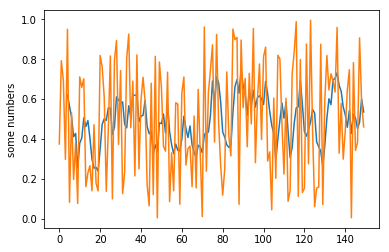

In [70]:
import matplotlib.pyplot as plt
plt.plot(df['MovingAverage'])
plt.plot(df['number'])

plt.ylabel('some numbers')
plt.show()

# 6. Reconfigure as needed:

/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


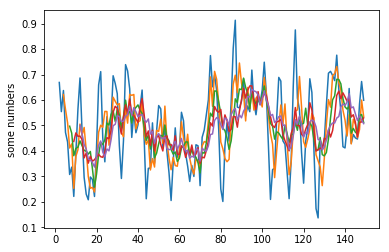

In [73]:
p_def = {}

for i in range(5,30,5):

    si = str(i)
    p_def['PointBuffer'+ str(i)]= {'name':'PointBuffer'+ str(i), 
                 'type': PointBuffer,
                 'settings':{'points':i, 'input':'number'}, ######## NOTE: Setting points to 10
                 'dependencies':[]}


    p_def['MovingAverage'+ str(i)]= {'name':'MovingAverage'+ str(i), 
                 'type': MovingAverage,
                 'settings':{},
                 'dependencies':['PointBuffer'+ str(i)]}


pn = ProcessingNetwork(p_def)

features = []
for p in data:
    feature = {'number' : p[0]}
    feature = pn.process(feature)
    features.append(feature)

df = pd.DataFrame(features)

for i in  range(5,30,5):
    plt.plot(df['MovingAverage'+ str(i)])

plt.ylabel('some numbers')
plt.show()